In [1]:
import networkx as nx

import matplotlib.pyplot as plt
import numpy
import numpy as np
import pylab
import os

from IPython.display import HTML
from ipywidgets import interact

%matplotlib inline

<IPython.core.display.Javascript object>


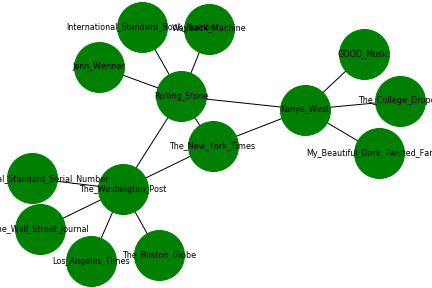




	Enter a Starting Wikipedia URL:


interactive(children=(Text(value='https://en.wikipedia.org/wiki/Kanye_West', description='url'), IntSlider(val…

In [2]:
%matplotlib notebook

# refresh graph
def refreshGraph():
    global pos
    plt.clf()
    pos = nx.spring_layout(G)
    if len(allNodes) < 15:
        nx.draw(G,pos,with_labels=True,font_size = 10,node_size=4000,node_color ='g')
    if 40 > len(allNodes) >= 15 :
        nx.draw(G,pos,with_labels=True,font_size = 8,node_size=2500,node_color ='g')
    if len(allNodes) >= 40:
        nx.draw(G,pos,with_labels=True,font_size = 6,node_size=1500,node_color ='g')
    plt.axis('off')
    plt.show()        

# On Click listener
def onClick(event):
    (x,y) = (event.xdata,event.ydata)
    closest = allNodes[0]
    closDist = pow(pow(x-pos[closest][0],2)+pow(y-pos[closest][1],2),.5)
    for i, name in enumerate(allNodes):            
        node = pos[name]
        distance = pow(pow(x-node[0],2)+pow(y-node[1],2),.5)
        if distance < closDist:
            closest = name
            closDist = distance
    if closDist < .3:
        callWiki(node=closest,url='https://en.wikipedia.org/wiki/{}'.format(closest))
        refreshGraph()
    else:
        refreshGraph()


# change to input as url and then run other script on that url
def buildNodes(fileName,node):
    file = open(fileName, "r")
    for line in file:
        # skip first line, http
        if line.startswith('http'):
            continue
        line = line.split('/')
        allNodes.append(line[2].strip('\n'))
        G.add_node(line[2].strip('\n'))
        G.add_edge(node,line[2].strip('\n'))


# Call the wikiCrawler.py function
def callWiki(node,url):
    output = os.popen("./wikiCrawler.py -l {} -nla {} -nll {}".format(url, 0, glinks)).read()
    output = output.split(':')
    output = output[2].rstrip().lstrip()
    buildNodes(output,node)

# when user enters a url in text box
def start(url, links):
    global glinks
    glinks = links
    G.clear()
    del allNodes[:]
    deleteFiles()
    urlN = url.split('/')[4]
    allNodes.append(urlN)
    G.add_node(urlN)
    pos = nx.spring_layout(G)
    refreshGraph()
    
# Delete outputted txt files from callWiki
def deleteFiles():
    os.system('rm *.txt')
    
# create graph
fig, ax = plt.subplots()
fig.canvas.mpl_connect('button_press_event', onClick)

glinks=5

G = nx.Graph()

# initialize list of all nodes in graph
allNodes = []

# make layout of graph more readable
pos = nx.spring_layout(G)

# Allow user to enter a custom url
print('\n\n')
print('\tEnter a Starting Wikipedia URL:')
interact(start, url='https://en.wikipedia.org/wiki/Kanye_West', links=5)

refreshGraph()

In [3]:
deleteFiles()